## DC analyse

In [2]:
from lcapy import Circuit

In [91]:
c = Circuit("""
V 1 0 12; down=1.5
R1 1 2 2; right=1.5
R2 2 0_2 4; down
W 0 0_2; right
""")

In [82]:
c = Circuit("""
V 1 0 dc; down=1.5
R1 1 2; right=1.5
R2 2 0_2; down
W 0 0_2; right
""")

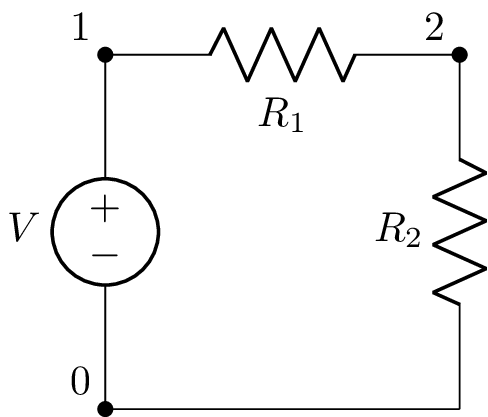

In [83]:
c.draw()

In [84]:
c.V.V

V

In [85]:
I = c.V.V / (c.R1.R + c.R2.R)

In [86]:
I

   V   
───────
R₁ + R₂

In [87]:
c.R2.V

  R₂⋅V 
───────
R₁ + R₂

In [88]:
c[2].V

  R₂⋅V 
───────
R₁ + R₂

In [89]:
c.R1.I

    R₂⋅V     
- ─────── + V
  R₁ + R₂    
─────────────
      R₁     

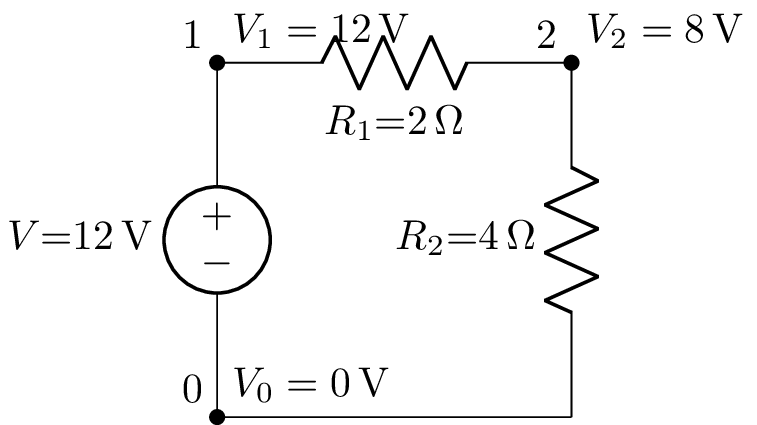

In [94]:
c.annotate_node_voltages(label_voltages=True).draw(draw_nodes='primary')

## Fasevektoranalyse

In [43]:
c = Circuit("""
V 1 0 ac 6; down=1.5
R 1 2 2; right=1.5
C 2 0_2 4; down
W 0 0_2; right
""")

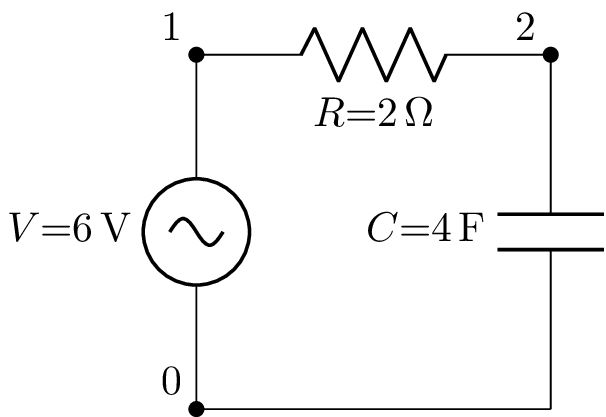

In [44]:
c.draw()

In [45]:
c.V.V

In [48]:
from lcapy import t
c.V.V(t)

6⋅cos(ω₀⋅t)

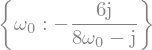

In [49]:
c.C.V

In [50]:
c.C.V.magnitude

   _______________
  ╱        2      
╲╱  2304⋅ω₀  + 36 
──────────────────
         2        
    64⋅ω₀  + 1    

In [51]:
c.C.V.phase

-atan(8⋅ω₀)

## Laplace-analyse

In [60]:
c = Circuit("""
P1 1 0; down=1.5, v_=v_i(t)
R 1 2 2; right=1.5
C 2 0_2 {1/4}; down
W 0 0_2; right
W 2 3; right
W 0_2 0_3; right
P2 3 0_3; down, v^=v_y(t)
""")

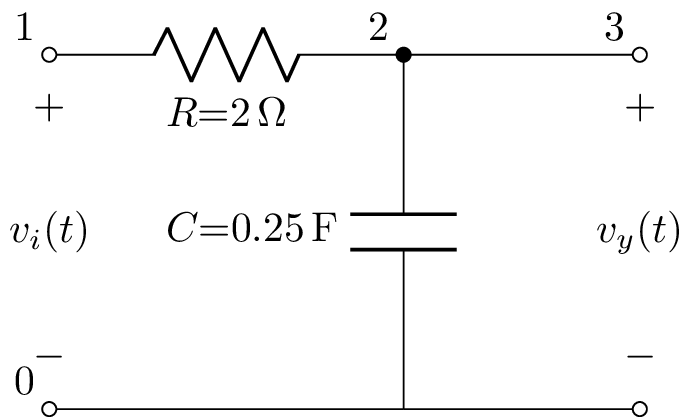

In [61]:
c.draw()

In [56]:
H = c.transfer(1, 0, 3, 0)

In [57]:
H

  1  
─────
s    
─ + 1
2    

In [59]:
H = c.P1.transfer('P2')
H

  2  
─────
s + 2

In [62]:
v_i = voltage(sin(3 * t) * u(t))

In [63]:
v_i

sin(3⋅t)⋅u(t)

In [64]:
V_i = v_i(s)

In [65]:
V_i

  3   
──────
 2    
s  + 9

In [66]:
V_o = V_i * H

In [67]:
V_o

       6        
────────────────
        ⎛ 2    ⎞
(s + 2)⋅⎝s  + 9⎠

In [68]:
V_o.ZPK()

             6             
───────────────────────────
(s + 2)⋅(s - 3⋅ⅉ)⋅(s + 3⋅ⅉ)

In [69]:
v_o = V_o(t)

In [70]:
v_o

  ⎛                                               -2⋅t⎞     
  ⎜2⋅sin(3⋅t)   cos(3⋅t)   (-2 - 3⋅ⅉ)⋅(-2 + 3⋅ⅉ)⋅ℯ    ⎟     
6⋅⎜────────── - ──────── + ───────────────────────────⎟⋅u(t)
  ⎝    39          13                  169            ⎠     

In [71]:
v_o.simplify_terms()

  ⎛   2⋅t               2⋅t             ⎞  -2⋅t     
2⋅⎝2⋅ℯ   ⋅sin(3⋅t) - 3⋅ℯ   ⋅cos(3⋅t) + 3⎠⋅ℯ    ⋅u(t)
────────────────────────────────────────────────────
                         13                         

### Graf over inn og utsignal

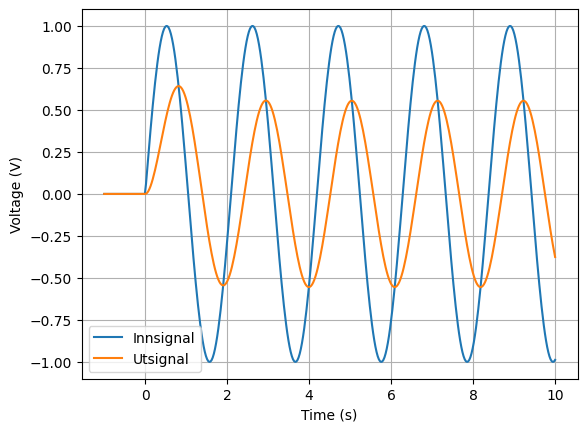

In [75]:
ax = v_i.plot((-1, 10), label='Innsignal')
ax = v_o.plot((-1, 10), axes=ax, label='Utsignal')
ax.legend()

### Bode-plot

<Axes: xlabel='Angular frequency (rad/s)'>

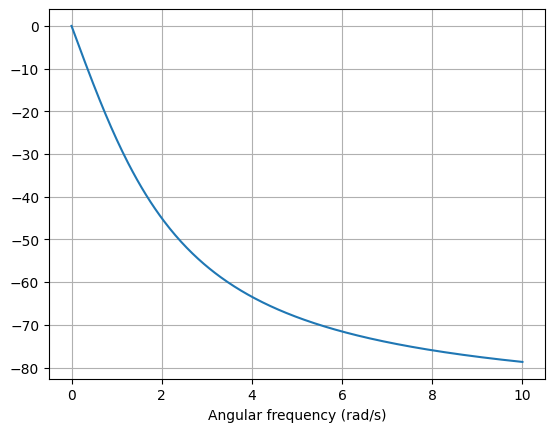

In [78]:
H(jw).phase_degrees.plot((0, 10))

<Axes: xlabel='Angular frequency (rad/s)'>

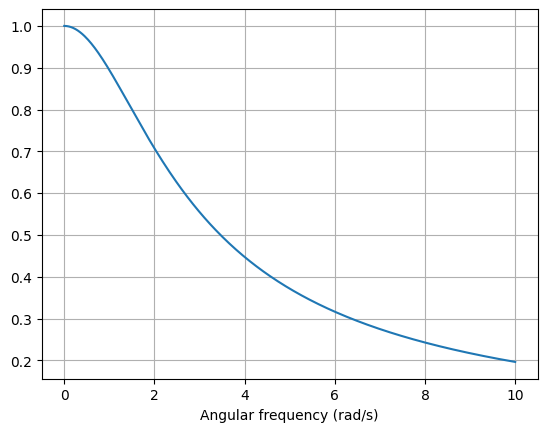

In [79]:
H(jw).magnitude.plot((0, 10))

<Axes: xlabel='Angular frequency (rad/s)'>

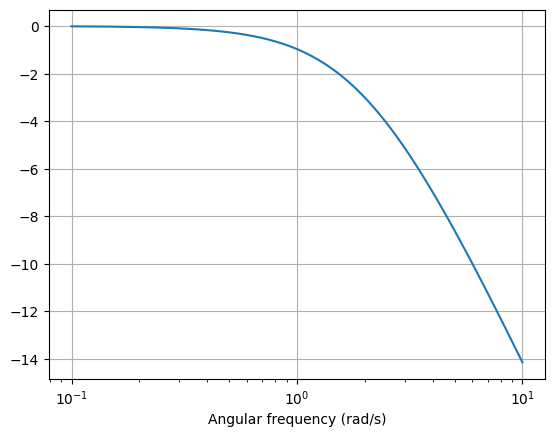

In [80]:
H(jw).dB.plot((0, 10), log_frequency=True)

In [1]:
from lcapy import Circuit
		
a = Circuit("""
V 1 0 {v(t)}; down
R1 1 2; right
L 2 3; right=1.5, i={i_L}
R2 3 0_3; down=1.5, i={i_{R2}}, v={v_{R2}}
W 0 0_3; right
W 3 3_a; right
C 3_a 0_4; down, i={i_C}, v={v_C}
W 0_3 0_4; right""")
		
ss = a.ss

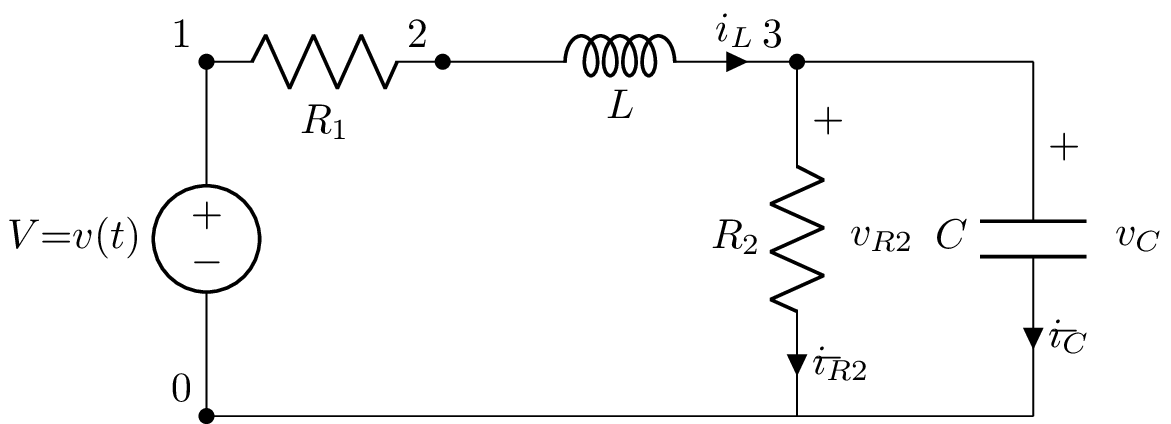

In [2]:
a.draw(scale=1)